In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model 
from sklearn .metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# load the diabetes data set 
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
datal = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']], 
                    columns = diabetes['feature_names'] + ['target'])
datal

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [4]:
feature_x = diabetes.data[:, np.newaxis, 0]
feature_x

array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025],
       [-0.09632802],
       [ 0.02717829],
       [ 0.01628068],
       [ 0.00538306],
       [ 0.04534098],
       [-0.05273755],
       [-0.00551455],
       [ 0.07076875],
       [-0.0382074 ],
       [-0.02730979],
       [-0.04910502],
       [-0.0854304 ],
       [-0.0854304 ],
       [ 0.04534098],
       [-0.06363517],
       [-0.06726771],
       [-0.10722563],
       [-0.02367725],
       [ 0.05260606],
       [ 0.06713621],
       [-0.06000263],
       [-0.02367725],
       [ 0.03444337],
       [ 0.03081083],
       [ 0.01628068],
       [ 0.04897352],
       [ 0.01264814],
       [-0.00914709],
       [-0.00188202],
       [-0.00188202],
       [ 0.00538306],
       [-0.09996055],
       [-0.06000263],
       [ 0.01991321],
       [ 0.04534098],
       [ 0

In [5]:
feature_x = diabetes.data[:, np.newaxis, 2]
feature_x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [6]:
# bmi feature
feature_x = diabetes.data[:, np.newaxis, 2]
target_y = diabetes.target

In [7]:
target_y = diabetes.target

In [8]:
# data cleaning 
# check for null values
# plot it and take a look 

# create training set and test set 
x_train, x_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=0)

In [9]:
print(len(x_train), len(y_train))

353 353


In [10]:
print(len(x_test), len(y_test))

89 89


In [11]:
# create linear regression object
regr = linear_model.LinearRegression()

#next step is to train

In [12]:
regr.fit(x_train, y_train) 

#whenever you call fit in sklearn, you're training that model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# making predictions using testing. Call the predict method on your model:
diabetes_y_pred = regr.predict(x_test)


In [14]:
#coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [981.65543614]


In [15]:
# the mean squared error
print("Mean squared error: %.2f" % mse(y_test, diabetes_y_pred))

Mean squared error: 4150.68


That's it. We've trained a regressor to take in features from the diabetes model. We used a single feature to keep this simple. It's not a whole lot of code :) 

In [18]:
# Explained variance score: 1 is perfect prediciton
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))

Variance score: 0.19


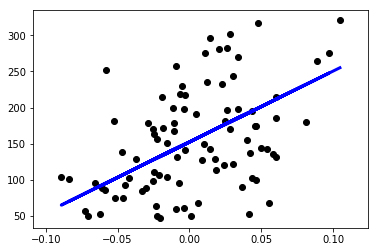

In [17]:
# plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, diabetes_y_pred, color='blue', linewidth=3)